In [4]:
import numpy as np
from sklearn.datasets import make_blobs,make_circles,make_classification
import matplotlib.pyplot as plt

In [68]:
# X,y = make_blobs(500,2,centers=2)
X,y = make_classification(1000,2,n_informative=2,n_redundant=0)

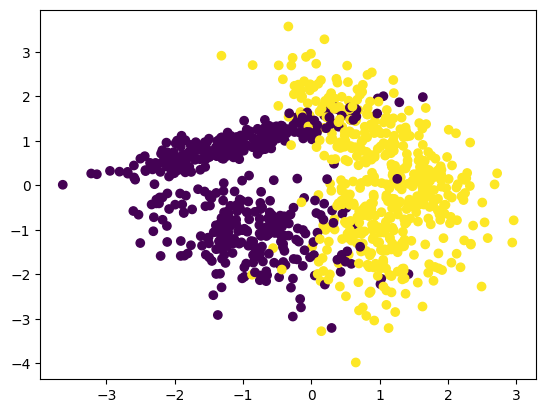

In [69]:
plt.scatter(X[:,0],X[:,1],c=y)

In [70]:
class NN:
    def __init__(self,input_dim = 2,hidden_layers = None,output_dim=1):
        self.weights = []
        self.bias = []
        
        self.weights.append(np.random.normal(0,np.sqrt(2/input_dim),size=(input_dim,hidden_layers[0])))
        for i in range(1,len(hidden_layers)):
            self.weights.append(np.random.normal(0,np.sqrt(2/hidden_layers[i-1]),size=(hidden_layers[i-1],hidden_layers[i])))

        self.weights.append(np.random.normal(0,np.sqrt(2/hidden_layers[-1]),size=(hidden_layers[-1],output_dim)))
        
        for i in range(len(hidden_layers)):
            self.bias.append(np.ones(hidden_layers[i]))

        self.bias.append(np.ones(output_dim))

    
    def activation(self,Z):
        return 1/(1+np.exp(-Z))
    
    def forwardProp(self,X):
        self.actvs = [X]
        for i in range(len(self.weights)):
            z = self.actvs[-1]@self.weights[i]+self.bias[i]
            self.actvs.append(self.activation(z))
        return self.actvs[-1]

    def loss(self,y,ypred):
        return -np.sum(y*np.log2(ypred)+(1-y)*np.log2(1-ypred))

    def derA(self,a):
        return a*(1-a)
        
    def backProp(self,X,y,lr=0.001,epochs=100):
        for e in range(epochs):
            ypred = self.forwardProp(X)
            delta = [ypred-y]
            grad = [self.actvs[-2].T@delta[-1]]

            for i in range(len(self.weights)-2,-1,-1):
                delta.append((delta[-1]@self.weights[i+1].T)*self.derA(self.actvs[i+1]))
                grad.append(self.actvs[i].T@delta[-1])

            wn = len(self.weights)-1
            for i in range(len(self.weights)):
                self.weights[i] = self.weights[i] - lr*grad[wn]
                self.bias[i] = self.bias[i] - lr*np.sum(delta[wn],axis = 0)
                wn -= 1

    def predict(self,X):
        ypred = self.forwardProp(X).reshape(-1)
        ypred[ypred < 0.5] = 0
        ypred[ypred >= 0.5] = 1
        return ypred

In [71]:
clf = NN(2,[4,3,2],1)

In [72]:
clf.weights

[array([[-0.41120142,  0.28488956,  1.2172317 , -0.27709704],
        [-1.61313868,  0.59903462, -1.10944855,  0.07764447]]),
 array([[ 0.56652416,  0.37029322, -0.23022261],
        [ 0.17699293,  0.30403211, -0.52183385],
        [ 0.82214778,  0.11900041, -0.78806265],
        [ 0.42466124, -0.16872362, -0.14471735]]),
 array([[-0.1211684 , -0.66636206],
        [ 1.14192731,  0.54272598],
        [-0.70213042,  0.50824165]]),
 array([[-0.20124294],
        [ 1.24945301]])]

In [73]:
clf.bias

[array([1., 1., 1., 1.]), array([1., 1., 1.]), array([1., 1.]), array([1.])]

In [74]:
clf.backProp(X,y.reshape((-1,1)),lr=0.001,epochs=1000)

In [75]:
clf.weights

[array([[-2.0539327 , -1.95610065,  1.33498502, -1.57617235],
        [-1.63735761,  1.89079774, -1.46546134, -1.07323826]]),
 array([[ 0.89685572,  1.28248485, -2.32326634],
        [ 0.30586707,  1.25491374, -1.61654775],
        [ 0.3825528 , -1.64420409,  1.2517564 ],
        [ 0.65794872,  0.52448666, -1.67242096]]),
 array([[-0.04511414, -1.47386495],
        [ 2.64036608, -1.59383369],
        [-4.41492142,  3.34466269]]),
 array([[-6.54528735],
        [ 4.57484346]])]

In [76]:
clf.bias

[array([ 0.75441614,  0.89233532, -0.64794225, -0.11501335]),
 array([ 0.76361645, -0.21926721,  2.52748842]),
 array([0.48390781, 0.60096865]),
 array([0.48564968])]

In [77]:
np.mean(y == clf.predict(X))

np.float64(0.929)